# Selection of frontier models using different methods

In [1]:
top_n_start_year = 2015.75  # greater than this value
top_n_end_year = 2025  # less than this value

# Setup

In [2]:
import json
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
data_loc = 'data/All ML Systems - full view.csv'
dtypes = {
    'Training compute (FLOP)': np.float64,
}
pcd_df = pd.read_csv(data_loc, dtype=dtypes)
pcd_df['Decimal year'] = pd.to_datetime(pcd_df['Publication date']).dt.year + (pd.to_datetime(pcd_df['Publication date']).dt.month - 1) / 12 + (pd.to_datetime(pcd_df['Publication date']).dt.day - 1) / 365

In [4]:
pcd_df

,Model,Domain,Task,Authors,Notability criteria,Notability criteria notes,Model accessibility,Link,Citations,Reference,...,Post-training compute (FLOP),Post-training compute notes,Hardware maker,benchmarks/models,Maybe over 1e25 FLOP,Updated dataset size,WT103 ppl,WT2 ppl,PTB ppl,Decimal year
0,EXAONE 3.5-R 2.4B,NaN,NaN,NaN,NaN,NaN,Unreleased,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025.202283
1,EXAONE 3.5-R 32B,NaN,NaN,NaN,NaN,NaN,Unreleased,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025.202283
2,EXAONE 3.5-R 7.8B,NaN,NaN,NaN,NaN,NaN,Unreleased,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025.202283
3,Gemma 3 27B,"Language,Vision,Multimodal","Language modeling/generation,Question answerin...","Core contributors: Aishwarya Kamath, Johan Fer...",NaN,NaN,Open weights (restricted use),https://storage.googleapis.com/deepmind-media/...,NaN,Gemma 3 Technical Report\n,...,NaN,NaN,Google,gemma-3-27b-it,NaN,NaN,NaN,NaN,NaN,2025.196804
4,Gemma 3 12B,"Language,Vision,Multimodal","Language modeling/generation,Question answerin...","Core contributors: Aishwarya Kamath, Johan Fer...",NaN,NaN,Open weights (restricted use),https://storage.googleapis.com/deepmind-media/...,NaN,Gemma 3 Technical Report\n,...,NaN,NaN,Google,gemma-3-12b-it,NaN,NaN,NaN,NaN,NaN,2025.196804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,DeepSeek-R1-Distill-Qwen-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2473,DeepSeek-R1-Distill-Qwen-1.5B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pcd_df['Publication date'] = pd.to_datetime(pcd_df['Publication date'])

In [6]:
pcd_df.sort_values('Publication date', inplace=True)

In [7]:
pcd_df.dropna(subset=['Publication date', 'Notability criteria', 'Training compute (FLOP)'], inplace=True)

In [8]:
# Exclude fine-tuned models
pcd_df = pcd_df[pcd_df['Base model'].isna()]

In [9]:
pcd_df

,Model,Domain,Task,Authors,Notability criteria,Notability criteria notes,Model accessibility,Link,Citations,Reference,...,Post-training compute (FLOP),Post-training compute notes,Hardware maker,benchmarks/models,Maybe over 1e25 FLOP,Updated dataset size,WT103 ppl,WT2 ppl,PTB ppl,Decimal year
2436,Theseus,Robotics,Maze solving,Claude Shannon,Historical significance,NaN,NaN,https://www.technologyreview.com/2018/12/19/13...,NaN,Mighty Mouse,...,NaN,NaN,NaN,NaN,NaN,0 checked out of 1,NaN,NaN,NaN,1950.502740
2431,Perceptron Mark I,Other,Binary classification,F Rosenblatt,"Historical significance,Highly cited",First modern neural network,NaN,https://blogs.umass.edu/brain-wars/files/2016/...,1610.0,The Perceptron—a perceiving and recognizing au...,...,NaN,NaN,NaN,NaN,NaN,0 checked out of 1,NaN,NaN,NaN,1957.000000
2430,Pandemonium (morse),Language,Morse translation,OG Selfridge,Highly cited,NaN,NaN,https://aitopics.org/doc/classics:504E1BAC/,1453.0,Pandemonium: A Paradigm for Learning,...,NaN,NaN,NaN,NaN,NaN,0 checked out of 1,NaN,NaN,NaN,1959.083333
2429,Samuel Neural Checkers,Games,Checkers,Arthur L. Samuel,Highly cited,NaN,NaN,https://ieeexplore.ieee.org/abstract/document/...,4671.0,Some studies in machine learning using the gam...,...,NaN,NaN,NaN,NaN,NaN,0 checked out of 1,NaN,NaN,NaN,1959.500000
2427,Perceptron (1960),Vision,Image classification,Frank Rosenblatt,Historical significance,NaN,NaN,https://www.semanticscholar.org/paper/Perceptr...,394.0,Perceptron Simulation Experiments,...,NaN,NaN,NaN,NaN,NaN,0 checked out of 1,NaN,NaN,NaN,1960.246119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Llama 3.3,Language,"Language modeling/generation,Question answerin...",NaN,Training cost,NaN,Open weights (restricted use),https://www.llama.com/docs/model-cards-and-pro...,NaN,Meta Llama 3.3 multilingual large language mod...,...,NaN,NaN,NVIDIA,Llama-3.3-70B-Instruct,NaN,NaN,NaN,NaN,NaN,2024.930365
57,EXAONE 3.5 32B,Language,"Language modeling/generation,Question answerin...","Soyoung An, Kyunghoon Bae, Eunbi Choi, Kibong ...",Training cost,NaN,Open weights (non-commercial),https://arxiv.org/abs/2412.04862,NaN,EXAONE 3.5: Series of Large Language Models fo...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.938584
40,DeepSeek-V3,Language,"Language modeling/generation,Code generation,Q...",NaN,Training cost,training cost was $5.3million USD (Table 1),Open weights (restricted use),https://github.com/deepseek-ai/DeepSeek-V3/blo...,NaN,DeepSeek-V3 Technical Report,...,NaN,NaN,NVIDIA,DeepSeek-V3,NaN,0 checked out of 1,NaN,NaN,NaN,2024.979680
18,Grok-3,"Language,Vision,Multimodal","Chat,Language modeling/generation,Question ans...",NaN,Training cost,NaN,Hosted access (no API),https://x.ai/blog/grok-3,NaN,Grok 3 Beta — The Age of Reasoning Agents,...,NaN,NaN,NVIDIA,NaN,NaN,NaN,NaN,NaN,NaN,2025.127169


In [10]:
outlier_window_size = 2  # years

In [11]:
start_large_scale_era = '2015-10-01'

# Top n all-time most compute-intensive (FIRST CHOICE)

In [12]:
for n in range(1, 21):
    # Add a column to mark the top n models
    pcd_df[f'top_{n}_at_release'] = False
    
    for row, model in pcd_df.iterrows():
        # Filter for models released through the model's release date
        yearly_df = pcd_df[pcd_df['Decimal year'] <= model['Decimal year']]
        # get the top n models by compute
        top_n_models = yearly_df.nlargest(n, 'Training compute (FLOP)')
        # mark these models in the original dataframe
        pcd_df.loc[top_n_models.index, f'top_{n}_at_release'] = True

/var/folders/s2/stl5t_bn7xg9vdfxxr71rzrc0000gn/T/ipykernel_24811/490392183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcd_df[f'top_{n}_at_release'] = False
/var/folders/s2/stl5t_bn7xg9vdfxxr71rzrc0000gn/T/ipykernel_24811/490392183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcd_df[f'top_{n}_at_release'] = False
/var/folders/s2/stl5t_bn7xg9vdfxxr71rzrc0000gn/T/ipykernel_24811/490392183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [13]:
pcd_df.columns

Index(['Model', 'Domain', 'Task', 'Authors', 'Notability criteria',
       'Notability criteria notes', 'Model accessibility', 'Link', 'Citations',
       'Reference',
       ...
       'top_11_at_release', 'top_12_at_release', 'top_13_at_release',
       'top_14_at_release', 'top_15_at_release', 'top_16_at_release',
       'top_17_at_release', 'top_18_at_release', 'top_19_at_release',
       'top_20_at_release'],
      dtype='object', length=119)

In [14]:
np.sum(pcd_df['top_4_at_release'])

90

In [15]:
pcd_df_n = pcd_df[(pcd_df['Decimal year'] > top_n_start_year) & (pcd_df['Decimal year'] < top_n_end_year)].copy()

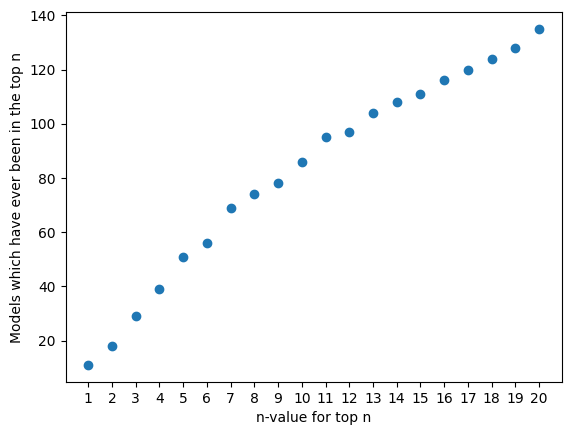

In [16]:
top_n = [np.sum(pcd_df_n[f'top_{n}_at_release']) for n in range(1, 21)]
plt.scatter(range(1, 21), top_n)
plt.xticks(ticks=range(1, 21))
plt.xlabel('n-value for top n')
plt.ylabel('Models which have ever been in the top n')
plt.show()

In [17]:
top_n_models = {}
for n in range(1, 21):
    models = pcd_df_n[pcd_df_n[f'top_{n}_at_release']]['Model'].values.tolist()
    top_n_models[n] = set(models)

for n in range(20, 1, -1):
    top_n_models[n] = list(top_n_models[n].difference(top_n_models[n-1]))
top_n_models[1] = list(top_n_models[1])

In [18]:
for n in range(1, 21):
    top_n_models[n] = list(sorted(top_n_models[n]))

In [19]:
with open('data/frontier_systems_by_top_n.json', 'w') as f:
    json.dump(top_n_models, f, indent=4)

# Default large scale systems

https://colab.research.google.com/drive/1PLGY5ErysqQMfy7Z08uIR2cTnnDgSaVR?usp=sharing

In [20]:
high_outliers_z_value_threshold = 0.76

In [21]:
large_scale_idx = set()

for index, row in pcd_df.iterrows():
  # Filter entries in a 2-year window around the paper
  window_size = pd.Timedelta(f'{outlier_window_size*52*7} days')
  half_window_size = window_size / 2
  mask = ( row['Publication date'] - half_window_size <= pcd_df['Publication date'] ) &\
        ( pcd_df['Publication date'] <= row['Publication date'] + half_window_size )
  window_df = pcd_df[mask].copy()

  if len(window_df) < 2: continue

  window_df['Training compute (FLOP) z scores'] = stats.zscore(np.log10(window_df['Training compute (FLOP)'].values))
  if window_df.loc[index, 'Training compute (FLOP) z scores'] > high_outliers_z_value_threshold:
    large_scale_idx.add(index)

large_scale_mask = pcd_df.index.isin(large_scale_idx) & (pcd_df['Publication date'] > start_large_scale_era)

In [22]:
large_scale_df = pcd_df[large_scale_mask]

In [23]:
large_scale_df

,Model,Domain,Task,Authors,Notability criteria,Notability criteria notes,Model accessibility,Link,Citations,Reference,...,top_11_at_release,top_12_at_release,top_13_at_release,top_14_at_release,top_15_at_release,top_16_at_release,top_17_at_release,top_18_at_release,top_19_at_release,top_20_at_release
2061,DeepSpeech2 (English),Speech,Speech recognition,"Dario Amodei, Rishita Anubhai, Eric Battenberg...",Highly cited,NaN,NaN,https://arxiv.org/abs/1512.02595,2853.0,Deep Speech 2: End-to-End Speech Recognition i...,...,True,True,True,True,True,True,True,True,True,True
2054,AlphaGo Lee,Games,Go,"David Silver, Aja Huang, Chris J. Maddison, Ar...",Highly cited,NaN,Unreleased,https://www.nature.com/articles/nature16961,16057.0,Mastering the game of Go with deep neural netw...,...,True,True,True,True,True,True,True,True,True,True
2001,GNMT,Language,Translation,"Yonghui Wu, Mike Schuster, Zhifeng Chen, Quoc ...",Highly cited,NaN,Hosted access (no API),https://arxiv.org/abs/1609.08144,6483.0,Google's Neural Machine Translation System: Br...,...,True,True,True,True,True,True,True,True,True,True
2000,Xception,Vision,Image classification,François Chollet,Highly cited,NaN,NaN,https://arxiv.org/abs/1610.02357,13038.0,Xception: Deep Learning with Depthwise Separab...,...,True,True,True,True,True,True,True,True,True,True
1991,NASv3 (CIFAR-10),Vision,"Image classification,Neural Architecture Searc...","Barret Zoph, Quoc V. Le",Highly cited,NaN,NaN,https://arxiv.org/abs/1611.01578,5098.0,Neural Architecture Search with Reinforcement ...,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Grok-2,"Language,Vision,Multimodal","Chat,Language modeling/generation,Question ans...",NaN,Training cost,NaN,Hosted access (no API),https://x.ai/blog/grok-2,NaN,Grok-2 Beta Release,...,True,True,True,True,True,True,True,True,True,True
312,GLM-4-Plus,Language,Language modeling,Zhipu AI,Training cost,NaN,API access,https://bigmodel.cn/dev/howuse/glm-4,NaN,GLM-4-Plus,...,True,True,True,True,True,True,True,True,True,True
109,Doubao-pro,Language,"Language modeling/generation,Question answerin...",NaN,Training cost,NaN,API access,https://www.volcengine.com/docs/6360/1264663,NaN,Doubao General Model Pro (Doubao-pro),...,True,True,True,True,True,True,True,True,True,True
18,Grok-3,"Language,Vision,Multimodal","Chat,Language modeling/generation,Question ans...",NaN,Training cost,NaN,Hosted access (no API),https://x.ai/blog/grok-3,NaN,Grok 3 Beta — The Age of Reasoning Agents,...,True,True,True,True,True,True,True,True,True,True


In [24]:
for system in large_scale_df['Model'][::-1]:
  print(system)

Claude 3.7 Sonnet
Grok-3
Doubao-pro
GLM-4-Plus
Grok-2
Llama 3.1-405B
Claude 3.5 Sonnet
GPT-4o
Claude 3 Opus
Gemini 1.5 Pro
GLM-4 (0116)
Gemini 1.0 Ultra
Inflection-2
GPT-4 Turbo
Claude 2
PaLM 2
SenseChat
GPT-4
GPT-3.5
Galactica
GLM-130B
AlexaTM 20B
BLOOM-176B
Parti
UL2
OPT-175B
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
GPT-NeoX-20B
AlphaCode
ERNIE 3.0 Titan
EXAONE 1.0
GLaM
Gopher (280B)
Yuan 1.0
Megatron-Turing NLG 530B
HyperCLOVA 82B
Jurassic-1-Jumbo
ViT-G/14
ByT5-XXL
ProtT5-XXL
Meta Pseudo Labels
Switch
DALL-E
mT5-XXL
GShard (dense)
iGPT-XL
GPT-3 175B (davinci)
Turing-NLG
Meena
ContextNet + Noisy Student
OpenAI Five
OpenAI Five Rerun
Noisy Student (L2)
XLM-RoBERTa
AlphaStar
T5-3B
T5-11B
Megatron-BERT
Megatron-LM (8.3B)
RoBERTa Large
XLNet
MnasNet-A3
MnasNet-A1 + SSDLite
GPT-2 (1.5B)
BigGAN-deep 512x512
Big Transformer for Back-Translation
ResNeXt-101 32x48d
AmoebaNet-A (F=448)
IMPALA
AlphaZero
AlphaGo Master
AlphaGo Zero
Libratus
OpenAI TI7 DOTA 1v1
JFT
NASv3 (CIFAR-10)
Xception
GNMT
Alpha

# Percentiles (SECOND CHOICE)

In [25]:
frontier_systems_by_percentile = {}
percentile_interval = 5
for percentile in range(95, -5, -percentile_interval):
  print(percentile)
  percentile_compute_low = np.zeros(len(pcd_df))
  percentile_compute_high = np.zeros(len(pcd_df))
  # Iterate through each row and calculate the 2-year moving average for each date
  for i, (index, row) in enumerate(pcd_df.iterrows()):
    # Define the 2-year window
    start_date = row['Publication date'] - pd.DateOffset(years=outlier_window_size/2)
    end_date = row['Publication date'] + pd.DateOffset(years=outlier_window_size/2)

    # Filter the DataFrame for this window
    window_df = pcd_df[(pcd_df['Publication date'] >= start_date) & (pcd_df['Publication date'] <= end_date)]

    percentile_compute_low[i] = np.percentile(window_df['Training compute (FLOP)'], percentile)
    percentile_compute_high[i] = np.percentile(window_df['Training compute (FLOP)'], percentile + percentile_interval)

  frontier_systems_flag = pcd_df['Training compute (FLOP)'] > np.array(percentile_compute_low)
  extra_frontier_systems_flag = pcd_df['Training compute (FLOP)'] <= np.array(percentile_compute_high)

  # raise Exception("Edit the following line if you want to consider models released after 2023-12-31.")
  extra_frontier_systems = pcd_df['Model'][frontier_systems_flag & extra_frontier_systems_flag & (pcd_df['Publication date'] > pd.to_datetime('2015-09-30')) & (pcd_df['Publication date'] < pd.to_datetime('2024-01-01'))].values

  frontier_systems_by_percentile[percentile] = list(extra_frontier_systems)

95
90
85
80
75
70
65
60
55
50
45
40
35
30
25
20
15
10
5
0


In [26]:
frontier_systems_by_percentile

{95: ['GNMT',
  'AlphaGo Zero',
  'AlphaGo Master',
  'AlphaZero',
  'OpenAI Five',
  'Meena',
  'GPT-3 175B (davinci)',
  'Megatron-Turing NLG 530B',
  'Gopher (280B)',
  'EXAONE 1.0',
  'ERNIE 3.0 Titan',
  'PaLM (540B)',
  'GPT-4',
  'Gemini 1.0 Ultra'],
 90: ['AlphaGo Fan',
  'AlphaGo Lee',
  'NASv3 (CIFAR-10)',
  'ResNeXt-101 32x48d',
  'T5-11B',
  'AlphaStar',
  'mT5-XXL',
  'Jurassic-1-Jumbo',
  'Chinchilla',
  'OPT-175B',
  'GPT-3.5',
  'GPT-4 Turbo'],
 85: ['JFT',
  'OpenAI TI7 DOTA 1v1',
  'BigGAN-deep 512x512',
  'Megatron-BERT',
  'XLM-RoBERTa',
  'Noisy Student (L2)',
  'GShard (dense)',
  'Switch',
  'Yuan 1.0',
  'GLaM',
  'LaMDA',
  'ST-MoE',
  'Parti',
  'SenseChat',
  'PaLM 2'],
 80: ['Xception',
  'Libratus',
  'AmoebaNet-A (F=448)',
  'Big Transformer for Back-Translation',
  'XLNet',
  'Megatron-LM (8.3B)',
  'T5-3B',
  'OpenAI Five Rerun',
  'Turing-NLG',
  'iGPT-XL',
  'Meta Pseudo Labels',
  'ProtT5-XXL',
  'ByT5-XXL',
  'HyperCLOVA 82B',
  'AlphaCode',
  'BLOOM

In [27]:
for percentile in range(95, -5, -percentile_interval):
    frontier_systems_by_percentile[percentile] = list(sorted(frontier_systems_by_percentile[percentile]))

In [28]:
# Save to JSON
with open('data/frontier_systems_by_window_percentile.json', 'w') as f:
    json.dump(frontier_systems_by_percentile, f, indent=4)

In [29]:
total_num_systems = 0
for percentile, systems in frontier_systems_by_percentile.items():
  total_num_systems += len(systems)
  print(percentile, 'to', percentile + percentile_interval)
  print(len(systems), "systems")
  print(f'Total systems above {percentile}th percentile: {total_num_systems}')
  for system in systems[::-1]:
    print(system)
  print()

95 to 100
14 systems
Total systems above 95th percentile: 14
PaLM (540B)
OpenAI Five
Megatron-Turing NLG 530B
Meena
Gopher (280B)
Gemini 1.0 Ultra
GPT-4
GPT-3 175B (davinci)
GNMT
EXAONE 1.0
ERNIE 3.0 Titan
AlphaZero
AlphaGo Zero
AlphaGo Master

90 to 95
12 systems
Total systems above 90th percentile: 26
mT5-XXL
T5-11B
ResNeXt-101 32x48d
OPT-175B
NASv3 (CIFAR-10)
Jurassic-1-Jumbo
GPT-4 Turbo
GPT-3.5
Chinchilla
AlphaStar
AlphaGo Lee
AlphaGo Fan

85 to 90
15 systems
Total systems above 85th percentile: 41
Yuan 1.0
XLM-RoBERTa
Switch
SenseChat
ST-MoE
Parti
PaLM 2
OpenAI TI7 DOTA 1v1
Noisy Student (L2)
Megatron-BERT
LaMDA
JFT
GShard (dense)
GLaM
BigGAN-deep 512x512

80 to 85
17 systems
Total systems above 80th percentile: 58
iGPT-XL
Xception
XLNet
Turing-NLG
T5-3B
ProtT5-XXL
OpenAI Five Rerun
Meta Pseudo Labels
Megatron-LM (8.3B)
Libratus
Inflection-2
HyperCLOVA 82B
ByT5-XXL
Big Transformer for Back-Translation
BLOOM-176B
AmoebaNet-A (F=448)
AlphaCode

75 to 80
11 systems
Total systems abov

# Distance from compute record at the time

In [30]:
ooms_from_frontier = 2

In [31]:
current_max = 0
running_max = np.zeros(len(pcd_df))
for i, compute in enumerate(pcd_df['Training compute (FLOP)']):
  if compute > current_max:
    running_max[i] = compute
    current_max = compute
  else:
    running_max[i] = current_max
running_max

array([4.00000000e+01, 6.94894940e+05, 6.00000000e+08, 6.00000000e+08,
       7.20000000e+08, 7.20000000e+08, 7.20000000e+08, 7.20000000e+08,
       7.20000000e+08, 7.20000000e+08, 7.20000000e+08, 7.20000000e+08,
       7.20000000e+08, 7.20000000e+08, 7.20000000e+08, 2.83280026e+10,
       2.83280026e+10, 2.83280026e+10, 2.83280026e+10, 2.83280026e+10,
       2.83280026e+10, 1.81440000e+11, 1.81440000e+11, 1.81440000e+11,
       1.49633805e+12, 1.49633805e+12, 1.49633805e+12, 1.49633805e+12,
       1.49633805e+12, 1.82321576e+13, 1.82321576e+13, 1.82321576e+13,
       1.82321576e+13, 1.82321576e+13, 1.82321576e+13, 1.82321576e+13,
       1.82321576e+13, 1.82321576e+13, 1.86219000e+13, 1.86219000e+13,
       1.86219000e+13, 1.86219000e+13, 1.86219000e+13, 2.10080000e+13,
       2.10080000e+13, 2.10080000e+13, 2.10080000e+13, 6.33900000e+15,
       6.33900000e+15, 6.33900000e+15, 6.33900000e+15, 6.33900000e+15,
       6.33900000e+15, 6.33900000e+15, 6.33900000e+15, 6.33900000e+15,
      

In [32]:
pcd_df['Frontier training compute (FLOP)'] = running_max

/var/folders/s2/stl5t_bn7xg9vdfxxr71rzrc0000gn/T/ipykernel_24811/997813373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcd_df['Frontier training compute (FLOP)'] = running_max


In [33]:
pcd_df['Frontier system'] = (pcd_df['Publication date'] > start_large_scale_era) & (np.log10(pcd_df['Frontier training compute (FLOP)']) - np.log10(pcd_df['Training compute (FLOP)']) <= ooms_from_frontier)
pcd_df[['Model', 'Frontier system']]

/var/folders/s2/stl5t_bn7xg9vdfxxr71rzrc0000gn/T/ipykernel_24811/962602648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcd_df['Frontier system'] = (pcd_df['Publication date'] > start_large_scale_era) & (np.log10(pcd_df['Frontier training compute (FLOP)']) - np.log10(pcd_df['Training compute (FLOP)']) <= ooms_from_frontier)


,Model,Frontier system
2436,Theseus,False
2431,Perceptron Mark I,False
2430,Pandemonium (morse),False
2429,Samuel Neural Checkers,False
2427,Perceptron (1960),False
...,...,...
58,Llama 3.3,True
57,EXAONE 3.5 32B,True
40,DeepSeek-V3,True
18,Grok-3,True


In [34]:
frontier_df = pcd_df[pcd_df['Frontier system']]
frontier_df

,Model,Domain,Task,Authors,Notability criteria,Notability criteria notes,Model accessibility,Link,Citations,Reference,...,top_13_at_release,top_14_at_release,top_15_at_release,top_16_at_release,top_17_at_release,top_18_at_release,top_19_at_release,top_20_at_release,Frontier training compute (FLOP),Frontier system
2061,DeepSpeech2 (English),Speech,Speech recognition,"Dario Amodei, Rishita Anubhai, Eric Battenberg...",Highly cited,NaN,NaN,https://arxiv.org/abs/1512.02595,2853.0,Deep Speech 2: End-to-End Speech Recognition i...,...,True,True,True,True,True,True,True,True,3.800000e+20,True
2058,ResNet-152 (ImageNet),Vision,Image classification,"Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun",Highly cited,NaN,NaN,https://arxiv.org/abs/1512.03385,175697.0,Deep Residual Learning for Image Recognition,...,True,True,True,True,True,True,True,True,3.800000e+20,True
2060,ResNet-101 (ImageNet),Vision,Image classification,"Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun",Highly cited,NaN,Open weights (unrestricted),https://arxiv.org/abs/1512.03385,175697.0,Deep Residual Learning for Image Recognition,...,True,True,True,True,True,True,True,True,3.800000e+20,True
2054,AlphaGo Lee,Games,Go,"David Silver, Aja Huang, Chris J. Maddison, Ar...",Highly cited,NaN,Unreleased,https://www.nature.com/articles/nature16961,16057.0,Mastering the game of Go with deep neural netw...,...,True,True,True,True,True,True,True,True,1.900000e+21,True
2013,ResNet-200,Vision,Image classification,"Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun",Highly cited,NaN,Unreleased,https://link.springer.com/chapter/10.1007/978-...,9621.0,Identity Mappings in Deep Residual Networks,...,True,True,True,True,True,True,True,True,1.900000e+21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Llama 3.3,Language,"Language modeling/generation,Question answerin...",NaN,Training cost,NaN,Open weights (restricted use),https://www.llama.com/docs/model-cards-and-pro...,NaN,Meta Llama 3.3 multilingual large language mod...,...,False,False,False,False,False,False,False,False,5.000000e+25,True
57,EXAONE 3.5 32B,Language,"Language modeling/generation,Question answerin...","Soyoung An, Kyunghoon Bae, Eunbi Choi, Kibong ...",Training cost,NaN,Open weights (non-commercial),https://arxiv.org/abs/2412.04862,NaN,EXAONE 3.5: Series of Large Language Models fo...,...,False,False,False,False,False,False,False,False,5.000000e+25,True
40,DeepSeek-V3,Language,"Language modeling/generation,Code generation,Q...",NaN,Training cost,training cost was $5.3million USD (Table 1),Open weights (restricted use),https://github.com/deepseek-ai/DeepSeek-V3/blo...,NaN,DeepSeek-V3 Technical Report,...,False,False,False,False,False,False,False,False,5.000000e+25,True
18,Grok-3,"Language,Vision,Multimodal","Chat,Language modeling/generation,Question ans...",NaN,Training cost,NaN,Hosted access (no API),https://x.ai/blog/grok-3,NaN,Grok 3 Beta — The Age of Reasoning Agents,...,True,True,True,True,True,True,True,True,4.640000e+26,True


In [35]:
for system in frontier_df['Model'][::-1]:
  print(system)

Claude 3.7 Sonnet
Grok-3
DeepSeek-V3
EXAONE 3.5 32B
Llama 3.3
Amazon Nova Pro
Hunyuan-Large
Doubao-pro
Movie Gen Video
Telechat2-115B
Qwen2.5-72B
Qwen2.5-32B
GLM-4-Plus
Grok-2
AFM-server
Mistral Large 2
Llama 3.1-70B
Llama 3.1-405B
GPT-4o mini
ESM3 (98B)
Claude 3.5 Sonnet
Nemotron-4 340B
Qwen2-72B
GPT-4o
Llama 3-8B
Llama 3-70B
Reka Core
DBRX
Inflection-2.5
Claude 3 Opus
Aramco Metabrain AI
Mistral Large
MegaScale (530B)
MegaScale (Production)
Gemini 1.5 Pro
Qwen1.5-72B
GLM-4 (0116)
Gemini 1.0 Ultra
Gemini 1.0 Pro
Qwen-72B
Inflection-2
GPT-4 Turbo
Grok-1
Yi-34B
Skywork-13B
Amazon Titan
Falcon-180B
Llama 2-34B
Llama 2-70B
Claude 2
xTrimoPGLM -100B
InternLM
PaLM 2
SenseChat
BloombergGPT
PanGu-Σ
GPT-4
Falcon-40B
LLaMA-13B
LLaMA-65B
LLaMA-7B
ViT-22B
GPT-3.5
Galactica
PaLI
GLM-130B
AlexaTM 20B
ESM2-15B
ESM2-3B
BLOOM-176B
Parti
CoCa
UL2
OPT-175B
Stable Diffusion (LDM-KL-8-G)
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
GPT-NeoX-20B
AlphaCode
ERNIE 3.0 Titan
XGLM-7.5B
GLIDE
EXAONE 1.0
GLaM
Gopher (280B

# Constant threshold

In [36]:
compute_threshold = 1e23

In [37]:
above_threshold = pcd_df[pcd_df['Training compute (FLOP)'] > compute_threshold]

In [38]:
print(len(above_threshold), 'systems')
for system in above_threshold['Model'][::-1]:
  print(system)

91 systems
Claude 3.7 Sonnet
Grok-3
DeepSeek-V3
EXAONE 3.5 32B
Llama 3.3
Amazon Nova Pro
Hunyuan-Large
Doubao-pro
Movie Gen Video
Telechat2-115B
Qwen2.5-72B
Qwen2.5-32B
GLM-4-Plus
Grok-2
AFM-server
AFM-on-device
Mistral Large 2
Llama 3.1-70B
Llama 3.1-405B
GPT-4o mini
ESM3 (98B)
Claude 3.5 Sonnet
Nemotron-4 340B
Qwen2-72B
GPT-4o
Llama 3-8B
Llama 3-70B
Reka Core
DBRX
MM1-30B
Inflection-2.5
Claude 3 Opus
Aramco Metabrain AI
Mistral Large
MegaScale (175B)
MegaScale (530B)
MegaScale (Production)
Gemini 1.5 Pro
Qwen1.5-72B
GLM-4 (0116)
Gemini 1.0 Ultra
Gemini 1.0 Pro
Qwen-72B
Inflection-2
Nemotron-3-8B
GPT-4 Turbo
Grok-1
Yi-34B
Skywork-13B
Amazon Titan
Falcon-180B
Llama 2-13B
Llama 2-34B
Llama 2-70B
Claude 2
xTrimoPGLM -100B
InternLM
PaLM 2
SenseChat
BloombergGPT
PanGu-Σ
GPT-4
Falcon-40B
LLaMA-65B
ViT-22B
GPT-3.5
Galactica
PaLI
GLM-130B
AlexaTM 20B
BLOOM-176B
Parti
UL2
OPT-175B
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
AlphaCode
ERNIE 3.0 Titan
EXAONE 1.0
GLaM
Gopher (280B)
Yuan 1.0
Megatron-Turi